In [2]:
library(tidyverse)
library(magrittr)
plotsize = function (x,y) options(repr.plot.width=x, repr.plot.height=y)

## An artificial dataset, where the "real world" is $Y \sim \mathcal{N}(x,1)$

### ($\theta=1$, $\sigma^2=1$)

In [4]:
true_theta = 1
true_sigma2 = 1
gen_data = function(true_theta, true_sigma2) {
    X = runif(100, -1,1)
    Y = rnorm(length(X), true_theta*X, true_sigma2)
    return(list(X=X,Y=Y))
}
data = gen_data(true_theta, true_sigma2)
X = data$X
Y = data$Y

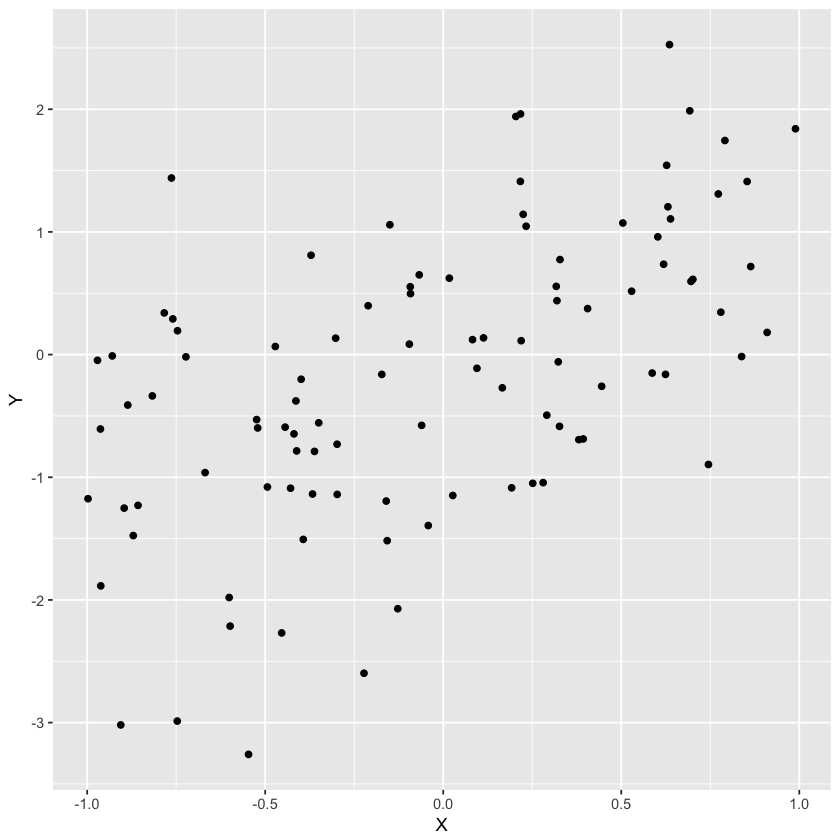

In [5]:
qplot(X,Y)

## Functions to calculate the likelihood of a point and of a dataset

In [6]:
likelihood_data_point = function(theta, sigma2, xi, yi) {
    pnorm(yi, theta*xi, sigma2)
}

likelihood_data_set = function(theta, sigma2, X, Y) {
    list(X,Y) %>%
        pmap_dbl(function(xi,yi) likelihood_data_point(theta, sigma2, xi, yi)) %>%
        prod
}

### The same, using log-likelihood

In [7]:
likelihood_data_point = function(theta, sigma2, xi, yi) {
    pnorm(yi, theta*xi, sigma2, log=T)
    - log(sqrt(sigma2)) - ((yi - theta*xi)^2)/(2*sigma2)
}

likelihood_data_set = function(theta, sigma2, X, Y) {
    list(X,Y) %>%
        pmap_dbl(function(xi,yi) likelihood_data_point(theta, sigma2, xi, yi)) %>%
        sum
}

### The most efficient implementation

In [8]:
likelihood_data_set = function(theta, sigma2, X, Y) {
    N = length(Y)
    -N*log(sqrt(sigma2)) - sum((Y-theta*X)^2)/(2*sigma2)
}

In [10]:
likelihood_data_set(1,0.4,X,Y)

[1] -74.18251

# A grid of parameter values to try

In [11]:
theta = seq(0,2,0.1)
sigma2 = seq(0.5, 1.5, 0.1)
params = expand.grid(theta=theta, sigma2=sigma2)

# Calculating the log-likelihood of each set of parameters given the data

In [12]:
model_likelihood = params %>%
    mutate(log_likelihood = params %>%
        pmap_dbl(function(theta, sigma2) likelihood_data_set(theta, sigma2, X, Y))) %>%
    mutate(maximum_likelihood = log_likelihood == max(log_likelihood))

Warning message:
: package ‘bindrcpp’ was built under R version 3.2.5

In [303]:
str(model_likelihood)

'data.frame':	231 obs. of  4 variables:
 $ theta             : num  0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 ...
 $ sigma2            : num  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 ...
 $ log_likelihood    : num  -102.1 -95.9 -90.4 -85.4 -81 ...
 $ maximum_likelihood: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...


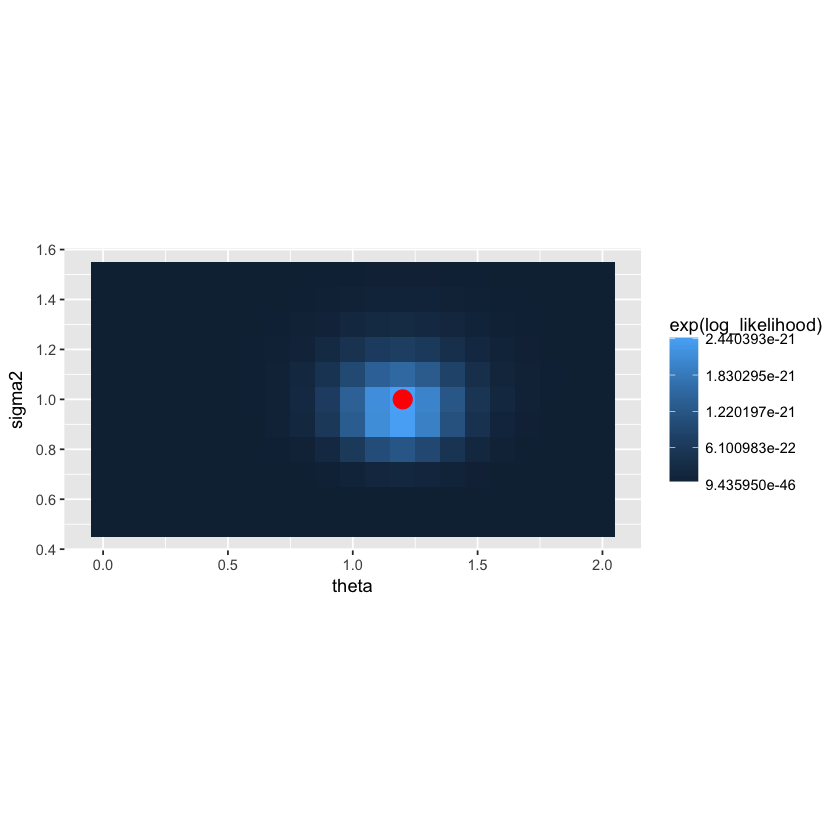

In [13]:
model_likelihood %>% 
ggplot(aes(x=theta, y=sigma2, fill=exp(log_likelihood)))+ 
    geom_tile() + 
    geom_point(data=model_likelihood %>% filter(maximum_likelihood), size=5, color="red") + 
    coord_fixed()